# Heart Disease Classification

# Problem Statement

The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

# Source

The dataset is publically available on the Kaggle website https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv , and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

# Attributes

Sex: male or female(Nominal)

Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Education: no further information provided Behavioral:

Current Smoker: whether or not the patient is a current smoker (Nominal)

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can

have any number of cigarettes, even half a cigarette.)

Information on medical history:

BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal)

Information on current medical condition:

Tot Chol: total cholesterol level (Continuous)

Sys BP: systolic blood pressure (Continuous)

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are

considered continuous because of large number of possible values.)

Glucose: glucose level (Continuous)

Target variable to predict:

10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

# Importing the Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Libraries required for the model

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the Libraries required for Model Evaluation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# Loading the Dataset

In [4]:
df = pd.read_csv("farmingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# EDA & VDA

In [5]:
print("Total Number Of Rows :",df.shape[0])
print("Total Number Of Columns :",df.shape[1])

Total Number Of Rows : 4240
Total Number Of Columns : 16


In [6]:
print("****Class Count****")
print("No Risk for coronary heart disease:",df['TenYearCHD'].value_counts()[0])
print("Risk of coronary heart disease:",df['TenYearCHD'].value_counts()[1])

****Class Count****
No Risk for coronary heart disease: 3596
Risk of coronary heart disease: 644


By looking at the count of the class you can see that they are Imbalanced data set

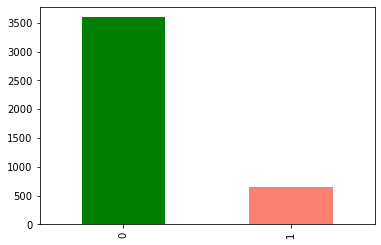

In [7]:
df['TenYearCHD'].value_counts().plot(kind='bar',color=['green','salmon'])
plt.show()

In [8]:
# Checking null values 
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
#Droping education column
df.drop(axis = 1,columns = ['education'],inplace = True) 

In [10]:
# Checking data types of each 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [11]:
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Attributes are not correctly classified as data type

In [12]:
# Rename column name male 
df.rename(columns = {'male':'gender'},inplace = True)

In [13]:
# unique values in each column 
for u in df.columns.to_list():
    print(u,' : ',df[u].unique())

gender  :  [1 0]
age  :  [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
currentSmoker  :  [0 1]
cigsPerDay  :  [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds  :  [ 0.  1. nan]
prevalentStroke  :  [0 1]
prevalentHyp  :  [0 1]
diabetes  :  [0 1]
totChol  :  [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 227. 249.
 176

In [14]:
df.isnull().sum()

gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
df.dropna(how = 'all', axis = 0, thresh = None, subset = None, inplace = False)

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [16]:
# filling glucose null values with median of the columns
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [17]:
df.dropna(inplace = True)

In [18]:
df.isnull().sum()

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:>

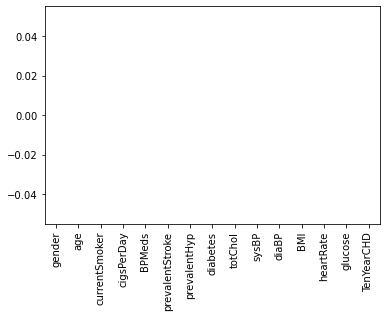

In [19]:
# Visual
df.isna().sum().plot(kind='bar',color='green')

In [20]:
# dataframe after removal of null values 
df.shape

(4090, 15)

In [21]:
# Statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4090.0,0.434719,0.495781,0.00,0.00,0.0,1.00,1.0
age,4090.0,49.499511,8.542193,32.00,42.00,49.0,56.00,70.0
currentSmoker,4090.0,0.490220,0.499965,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4090.0,8.995355,11.913388,0.00,0.00,0.0,20.00,70.0
BPMeds,4090.0,0.029340,0.168778,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4090.0,0.005379,0.073153,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4090.0,0.309291,0.462258,0.00,0.00,0.0,1.00,1.0
diabetes,4090.0,0.025428,0.157440,0.00,0.00,0.0,0.00,1.0
totChol,4090.0,236.659658,44.467756,113.00,206.00,234.0,263.00,696.0
sysBP,4090.0,132.226528,21.901522,83.50,117.00,128.0,143.50,295.0


In [22]:
# Current by chance of coronary heart disease
pd.crosstab(df['currentSmoker'],df['TenYearCHD'],margins=True)

TenYearCHD,0,1,All
currentSmoker,,,
0,1792,293,2085
1,1687,318,2005
All,3479,611,4090


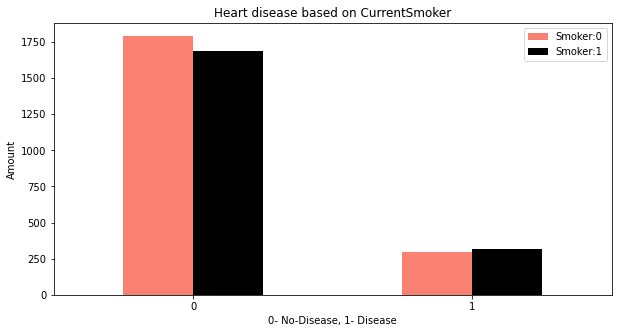

In [23]:
# tenyearchd based on gender 
pd.crosstab(df['TenYearCHD'],df['currentSmoker']).plot(kind="bar", color=['salmon','black'], figsize=(10,5))
plt.title("Heart disease based on CurrentSmoker")
plt.xlabel("0- No-Disease, 1- Disease")
plt.ylabel("Amount")
plt.legend(['Smoker:0','Smoker:1'])
plt.xticks(rotation=0);

In [24]:
# gender by chance of coronary heart disease
pd.crosstab(df['gender'],df['TenYearCHD'],margins=True)

TenYearCHD,0,1,All
gender,,,
0,2036,276,2312
1,1443,335,1778
All,3479,611,4090


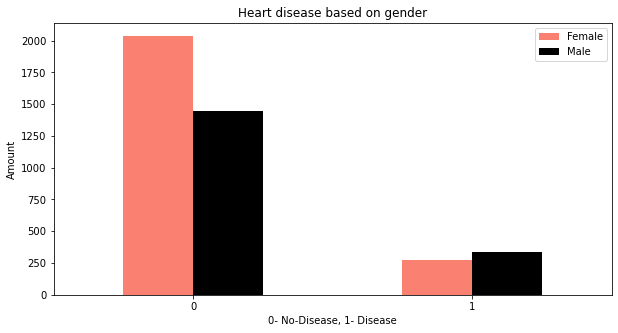

In [25]:
# tenyearchd based on gender 
pd.crosstab(df['TenYearCHD'],df['gender']).plot(kind="bar", color=['salmon','black'], figsize=(10,5))
plt.title("Heart disease based on gender")
plt.xlabel("0- No-Disease, 1- Disease")
plt.ylabel("Amount")
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [26]:
# diabetes by chance of coronary heart disease
pd.crosstab(df['diabetes'],df['TenYearCHD'],margins=True)

TenYearCHD,0,1,All
diabetes,,,
0,3411,575,3986
1,68,36,104
All,3479,611,4090


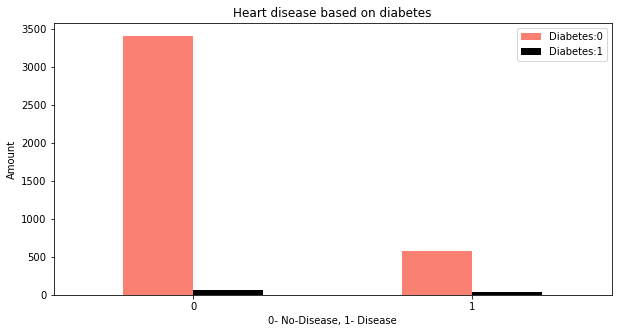

In [27]:
# tenyearchd based on gender 
pd.crosstab(df['TenYearCHD'],df['diabetes']).plot(kind="bar", color=['salmon','black'], figsize=(10,5))
plt.title("Heart disease based on diabetes")
plt.xlabel("0- No-Disease, 1- Disease")
plt.ylabel("Amount")
plt.legend(['Diabetes:0','Diabetes:1'])
plt.xticks(rotation=0);

In [28]:
# BpMeds by chance of coronary heart disease
pd.crosstab(df['BPMeds'],df['TenYearCHD'],margins=True)

TenYearCHD,0,1,All
BPMeds,,,
0.0,3398,572,3970
1.0,81,39,120
All,3479,611,4090


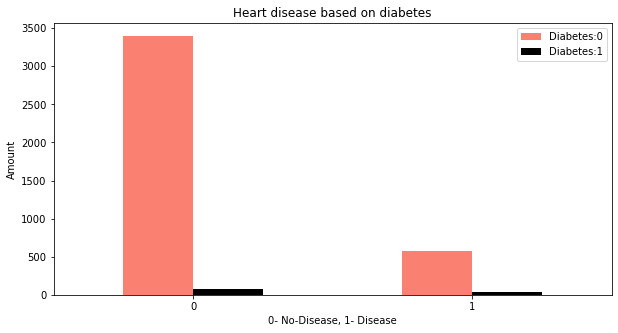

In [29]:
# tenyearchd based on BPMeds 
pd.crosstab(df['TenYearCHD'],df['BPMeds']).plot(kind="bar", color=['salmon','black'], figsize=(10,5))
plt.title("Heart disease based on diabetes")
plt.xlabel("0- No-Disease, 1- Disease")
plt.ylabel("Amount")
plt.legend(['Diabetes:0','Diabetes:1'])
plt.xticks(rotation=0);

In [30]:
# prevalentHyp by chance of coronary heart disease
pd.crosstab(df['prevalentHyp'],df['TenYearCHD'],margins=True)

TenYearCHD,0,1,All
prevalentHyp,,,
0,2520,305,2825
1,959,306,1265
All,3479,611,4090


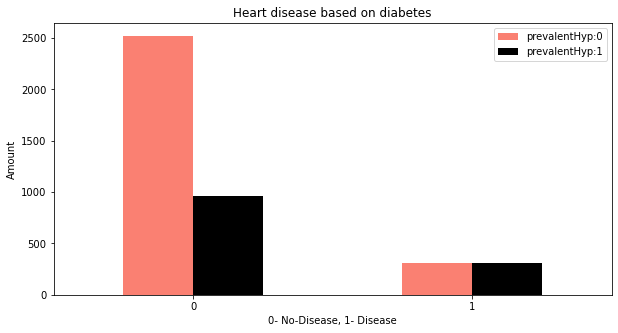

In [31]:
# tenyearchd based on prevalentHyp
pd.crosstab(df['TenYearCHD'],df['prevalentHyp']).plot(kind="bar", color=['salmon','black'], figsize=(10,5))
plt.title("Heart disease based on diabetes")
plt.xlabel("0- No-Disease, 1- Disease")
plt.ylabel("Amount")
plt.legend(['prevalentHyp:0','prevalentHyp:1'])
plt.xticks(rotation=0);

In [32]:
# prevalentStroke by chance of coronary heart disease
pd.crosstab(df['prevalentStroke'],df['TenYearCHD'],margins=True)

TenYearCHD,0,1,All
prevalentStroke,,,
0,3465,603,4068
1,14,8,22
All,3479,611,4090


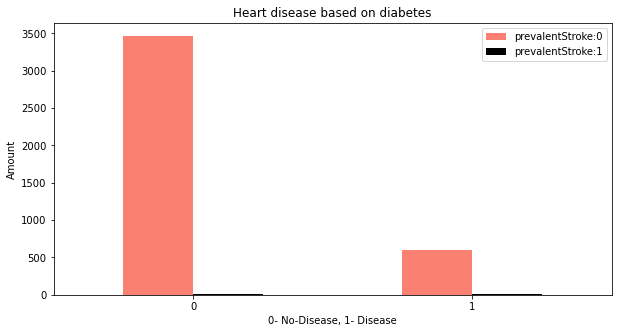

In [33]:
# tenyearchd based on prevalentStroke
pd.crosstab(df['TenYearCHD'],df['prevalentStroke']).plot(kind="bar", color=['salmon','black'], figsize=(10,5))
plt.title("Heart disease based on diabetes")
plt.xlabel("0- No-Disease, 1- Disease")
plt.ylabel("Amount")
plt.legend(['prevalentStroke:0','prevalentStroke:1'])
plt.xticks(rotation=0);

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
df.TenYearCHD.unique()

array([0, 1], dtype=int64)

In [36]:
X = df.iloc[:,0:14].values
X.shape

(4090, 14)

In [37]:
scaler.fit(X)
X = scaler.transform(X)

In [38]:
Y = df['TenYearCHD'].values
Y.shape

(4090,)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [40]:
class_weight=dict({0:1,1:100})

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [42]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[704   0]
 [112   2]]
0.863080684596577
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       704
           1       1.00      0.02      0.03       114

    accuracy                           0.86       818
   macro avg       0.93      0.51      0.48       818
weighted avg       0.88      0.86      0.80       818



# Over Sampling

In [43]:
from collections import Counter
Counter(y_train)

Counter({0: 2775, 1: 497})

In [44]:
from imblearn import under_sampling, over_sampling

In [45]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(Y_resampled).items()),Y_resampled.shape)

[(0, 3479), (1, 3479)] (6958,)


In [46]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(X,Y)
print(sorted(Counter(Y_resampled).items()),Y_resampled.shape)

[(0, 611), (1, 611)] (1222,)


In [47]:
print(classifier.predict([[0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0	]]))

[0]


In [48]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 2775, 1: 497})
The number of classes after fit Counter({0: 2775, 1: 2081})


C:\Users\Harish\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [51]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[685  19]
 [ 99  15]]
0.8557457212713936
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       704
           1       0.44      0.13      0.20       114

    accuracy                           0.86       818
   macro avg       0.66      0.55      0.56       818
weighted avg       0.81      0.86      0.82       818



In [52]:
df

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [53]:
print(classifier.predict([[0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0]]))

[0]


In [54]:
print("Selcting only important feature ")
classifier.feature_importances_
cl = "TenYearCHD"
fi = df.drop(cl,axis=1)
feature_importance = pd.DataFrame({'importance': classifier.feature_importances_}, index= fi.columns).sort_values('importance')
feature_importance

Selcting only important feature 


,importance
prevalentStroke,0.001378
diabetes,0.006200
BPMeds,0.006719
currentSmoker,0.011494
prevalentHyp,0.023276
gender,0.023949
cigsPerDay,0.053652
heartRate,0.102639
diaBP,0.113481
glucose,0.120104


Imp feature extracted ,Train the algorithm again with only imp feature


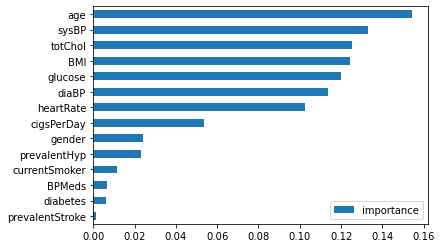

In [55]:
feature_importance.plot.barh()
to_keep = feature_importance[feature_importance.importance > 0.1].index;to_keep
print('Imp feature extracted ,Train the algorithm again with only imp feature')

In [56]:
df

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [57]:
import pickle
pickle.dump(classifier,open('heart.pkl','wb'))

In [60]:
classifier.predict([[0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0]])

array([1], dtype=int64)